In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# in principle, model validation is very simple: after choosing a model and its hyperparameters we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)
# fit the model on one set of data
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X1, y1)
# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.8933333333333333

In [4]:
# model validation via cross-validation
# one disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. one way to address this is to use cross-validation. which is a sequence of fits where each subset of data is used both as a training set and as a validation set.
# here we do two validation trials, alternately using each half of the data as a holdout set.
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)
# this is two fold cross-validation

(0.96, 0.8933333333333333)

In [5]:
# to split the data into five groups, we can use five-fold cross-validation
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [6]:
# we may want to use an extreme case in which our number of folds is equal to the number of data points. this means training on all points except one in each trial. this type of cross-validation is known as leave-one-out cross-validation
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
# this gives us scores for 150 trials and each score indicates either a successful or unsuccessful prediction
scores.mean()  # this is our estimate of the error rate

0.96

In [221]:
# selecting the best model
# If our estimator is underperforming, how should we move forward? There are several possible answers:
# Use a more complicated/more flexible model
# use a less complicated/less flexible model
# gather more training samples
# gather more data to add features to each sample
# best model finds the sweet spot between bias and variance
# high bias model is most likely to underfit the data the performance of the model on the validation set is similar to the performance on the training set
# high variance model is most likely to overfit the data the performance of the model on the validation set is far worse than the performance on the training set
# For very low model complexity (a high-bias model), the training data is underfit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
# For very high model complexity (a high-variance model), the training data is overfit, which means that the model predicts the training data very well, but fails for any previously unseen data.
# For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.
# we cn use cross-validation to compute the valiidation curve for a class of models. here we will use a polynomial regression model: a generalized linear model in which the degree of the polynomial is a tunable parameter.
# we can implement this with a simple linear regression combined with the polynomial preprocessor we will use a pipeline to string these operations together
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

def make_data(N, err=1.0, rseed=23):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

/var/folders/8q/0wn9p2n54hb1x_gb6ckxsdxr0000gn/T/ipykernel_31315/4238924886.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


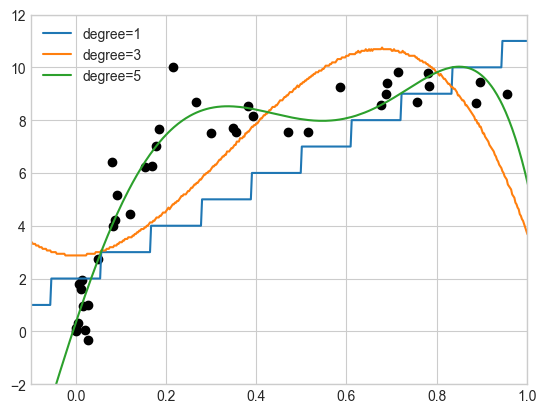

In [222]:
# we can now visulatize our data, along with polynomial fits of several degrees
plt.style.use('seaborn-whitegrid')

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

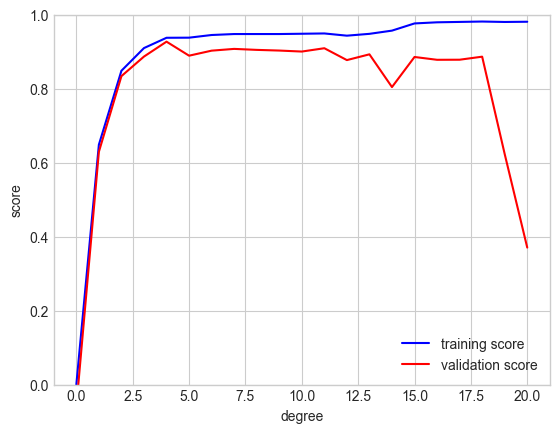

In [223]:
# we want to look for the degree of polynomial that minimizes the error between the model and the data (the bias) while also minimizing the variance of the model. we can visualize this validation curve using the validation_curve function in scikit-learn
degree = np.arange(0, 21)
train_score, val_score = validation_curve(
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1),
         color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1),
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

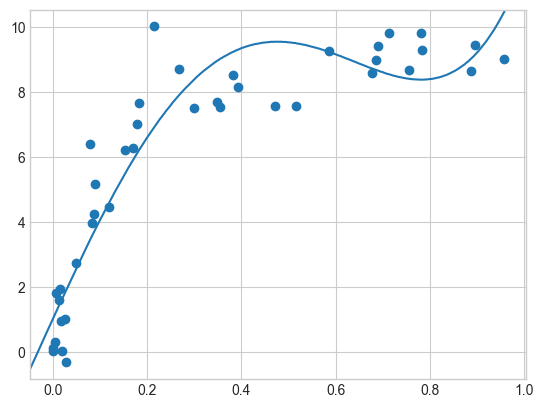

In [231]:
# this shows precisely the qualitative behavior we expect the training score is everywhere higher than the validation score the training score is monotonically improving with increased model complexity and the validation score reaches a maximum before dropping off as the model becomes overfit
# from the validation curve we can determine that the optimal trade off between bias and variance is found around a third-order polynomial
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

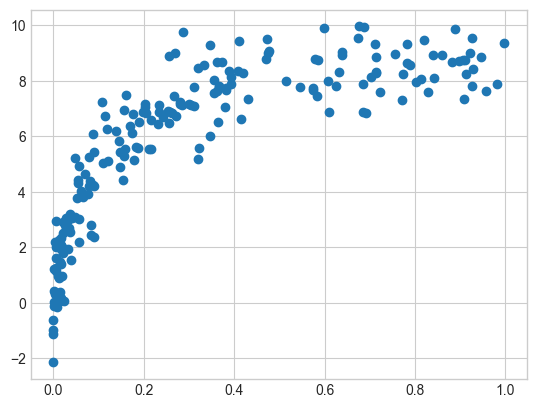

In [225]:
# learning curves in sklearn we can generate a new dataset with 5 times as many points
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

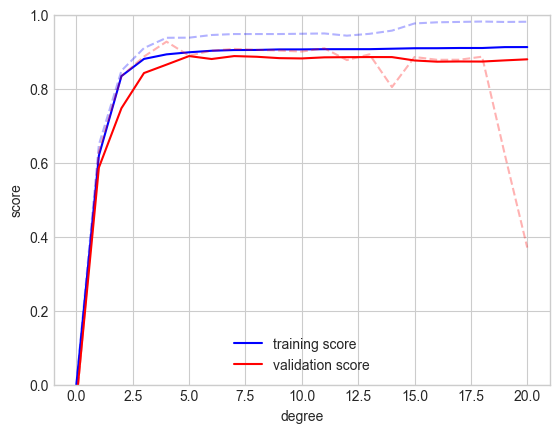

In [226]:
# the solid lines show the new result while the fainter dashed lines show the results of our previous lower complexity model 
# A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
# A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
# A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.
degree = np.arange(21)
train_score2, val_score2 = validation_curve(
    PolynomialRegression(), X2, y2,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1),
         color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1),
         color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1),
         color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1),
         color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

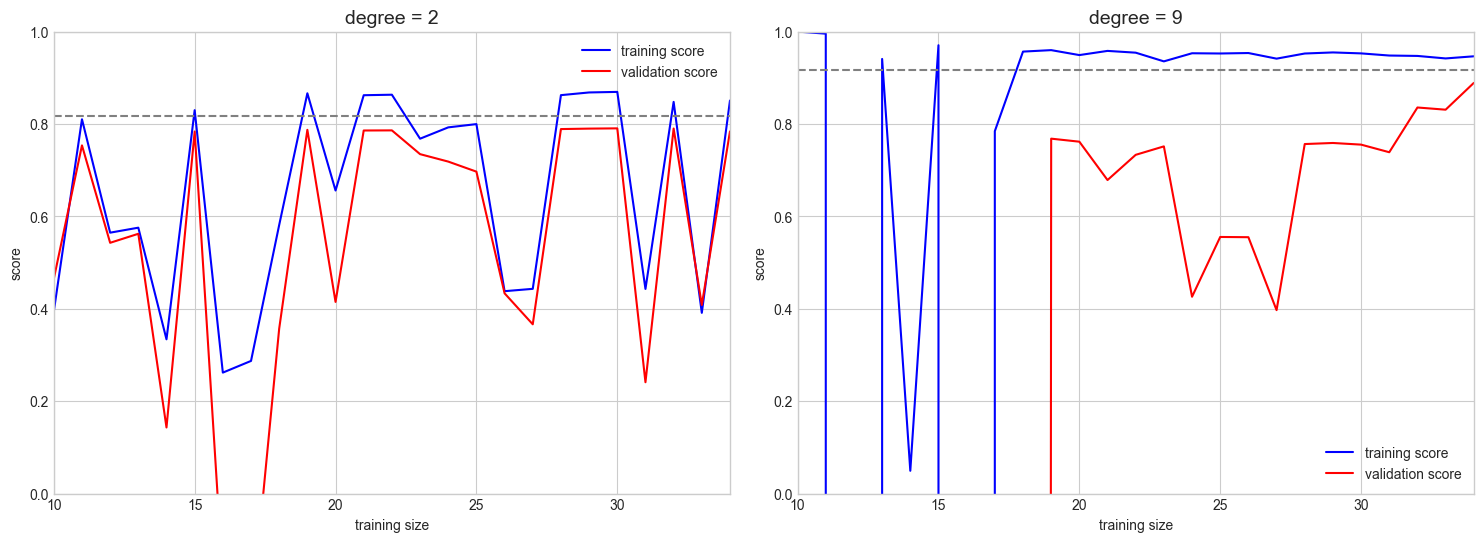

In [227]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(
        PolynomialRegression(degree), X, y, cv=7,
        train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1),
               color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1),
               color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0],
                 N[-1], color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')
# this is a valuable diagnostic, it gives us a visual depiction of how our model responds to increasing amounts of training data. in particular when the learning curve has already converged it is often possible to increase model performance by training on more data


In [228]:
# grid search cross validation
# we can automate the process of tuning the hyperparameters via grid search cross validation
# this is a brute force exhaustive search paradigm where we specify a list of values for different hyperparameters and the computer evaluates the model performance for each combination of those to obtain the optimal combination
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y);

In [229]:
grid.best_params_

{'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 4}

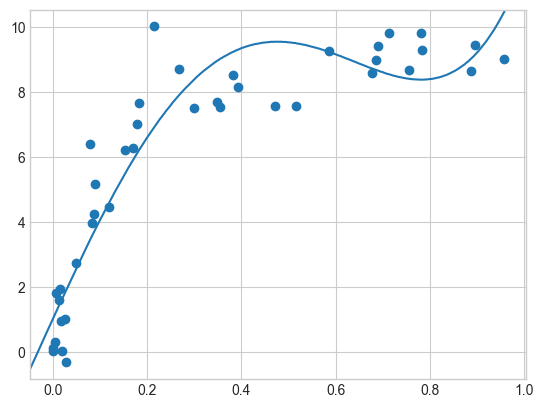

In [230]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);